In [1]:
# Cell 1
# This code sets up the environment for data analysis and visualization in Python.
# It imports essential libraries: pandas for data manipulation, numpy for numerical operations,
# pathlib for file path handling, and matplotlib for plotting.
# Additionally, it configures pandas display options to show up to 200 columns and a display width of 160 characters.

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)


In [15]:
# Cell 2
# This cell loads and preprocesses the daily Whoop dataset from a CSV file.
# It checks for the file's existence, reads it into a pandas DataFrame, parses and sorts by date,
# converts specified columns to numeric types, fills missing workout-related fields with zeros,
# and displays the last 5 rows for verification.
# data_path = Path("data/processed/daily_v1.csv")
# assert data_path.exists(), f"Missing {data_path}. Run 30_whoop_daily_dataset.ipynb first."
# 
#
#
df = pd.read_csv(data_path)

# Parse date
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.sort_values("date").reset_index(drop=True)

# Ensure numeric columns are numeric (CSV sometimes loads as object)
num_cols = [
    "recovery_score","hrv_rmssd_milli","resting_hr","spo2_pct","skin_temp_c",
    "sleep_perf_pct","sleep_eff_pct","sleep_consistency_pct","resp_rate","sleep_asleep_hours_est",
    "cycle_strain","cycle_kilojoule","cycle_avg_hr","cycle_max_hr",
    "workout_count","workout_minutes","workout_strain_sum","workout_kj_sum",
    "workout_avg_hr_mean","workout_max_hr_max",
]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Fill workout fields (so charts and sums behave)
for c in ["workout_count","workout_minutes","workout_strain_sum","workout_kj_sum"]:
    if c in df.columns:
        df[c] = df[c].fillna(0)

df.tail(5)



,date,recovery_score,hrv_rmssd_milli,resting_hr,spo2_pct,skin_temp_c,sleep_perf_pct,sleep_eff_pct,sleep_consistency_pct,resp_rate,sleep_asleep_hours_est,cycle_strain,cycle_kilojoule,cycle_avg_hr,cycle_max_hr,workout_count,workout_minutes,workout_strain_sum,workout_kj_sum
20,2025-12-25,97.0,96.895070,47.0,96.11364,32.542330,84.0,87.832350,69.0,14.707031,9.510975,4.295734,8805.438,58,126,0.0,0.0000,0.000000,0.00000
21,2025-12-26,59.0,69.344070,54.0,94.50000,32.828278,87.0,88.210920,77.0,16.074219,9.301303,4.047214,8176.028,61,108,0.0,0.0000,0.000000,0.00000
22,2025-12-27,70.0,75.462850,49.0,96.36364,32.689667,91.0,90.435165,81.0,14.560547,9.707414,5.269515,9110.884,59,134,0.0,0.0000,0.000000,0.00000
23,2025-12-28,76.0,80.228810,48.0,96.07895,32.924667,92.0,89.326680,83.0,15.058594,8.232300,4.784610,8136.666,58,138,1.0,54.1536,2.374022,317.47568
24,2025-12-29,44.0,59.602093,55.0,95.77273,32.927000,86.0,90.235880,71.0,15.058594,10.402650,0.585624,4490.063,55,94,0.0,0.0000,0.000000,0.00000


In [14]:
import sys, site
print("executable:", sys.executable)
print("version:", sys.version)
print("site-packages:", site.getsitepackages())


executable: /home/grifin/projects/whoop-ai-fitness-lab/.venv/bin/python
version: 3.10.12 (main, Nov  4 2025, 08:48:33) [GCC 11.4.0]
site-packages: ['/home/grifin/projects/whoop-ai-fitness-lab/.venv/lib/python3.10/site-packages', '/home/grifin/projects/whoop-ai-fitness-lab/.venv/local/lib/python3.10/dist-packages', '/home/grifin/projects/whoop-ai-fitness-lab/.venv/lib/python3/dist-packages', '/home/grifin/projects/whoop-ai-fitness-lab/.venv/lib/python3.10/dist-packages']


In [3]:
# Cell 3
# This cell filters the dataframe to a recent time window (default 90 days back from the latest date).
# It calculates the start and end dates, creates a subset dataframe 'dfw' for that period,
# and prints summary information including the date range, number of rows, missing values in sleep hours,
# and displays the first 3 rows for verification.

days_back = 90  # change to 60 if you want
end_date = df["date"].max()
start_date = end_date - pd.Timedelta(days=days_back)

dfw = df[(df["date"] >= start_date) & (df["date"] <= end_date)].copy()

print("Window:", start_date.date(), "→", end_date.date())
print("Rows:", len(dfw))
print("Missing sleep_asleep_hours_est:", dfw["sleep_asleep_hours_est"].isna().sum() if "sleep_asleep_hours_est" in dfw.columns else "N/A")
dfw.head(3)


Window: 2025-09-30 → 2025-12-29
Rows: 25
Missing sleep_asleep_hours_est: 6


,date,recovery_score,hrv_rmssd_milli,resting_hr,spo2_pct,skin_temp_c,sleep_perf_pct,sleep_eff_pct,sleep_consistency_pct,resp_rate,sleep_asleep_hours_est,cycle_strain,cycle_kilojoule,cycle_avg_hr,cycle_max_hr,workout_count,workout_minutes,workout_strain_sum,workout_kj_sum
0,2025-12-05,62.0,78.209410,54.0,93.79412,32.162666,NaN,NaN,NaN,NaN,NaN,14.488295,10914.839,70,157,0.0,0.0,0.0,0.0
1,2025-12-06,52.0,70.990630,55.0,95.55882,33.171665,NaN,NaN,NaN,NaN,NaN,14.015359,9358.760,71,124,0.0,0.0,0.0,0.0
2,2025-12-07,41.0,61.885914,56.0,96.00000,33.763668,NaN,NaN,NaN,NaN,NaN,5.227047,8380.236,65,134,0.0,0.0,0.0,0.0


In [4]:
# Cell 4
# This cell adds rolling averages and comparative metrics to the filtered dataframe 'dfw'.
# It defines a function 'add_rolls' that computes 7-day, 14-day, and 30-day rolling averages for a given column,
# along with the delta and percentage change relative to the 14-day average.
# The function is then applied to key health metrics columns if they exist in the dataframe,
# enhancing the data with trend analysis features for visualization and insights.
# Finally, it displays the last 3 rows with selected columns to verify the additions.

def add_rolls(df_in, col):
    df_in[f"{col}_7d_avg"] = df_in[col].rolling(7, min_periods=3).mean()
    df_in[f"{col}_14d_avg"] = df_in[col].rolling(14, min_periods=5).mean()
    df_in[f"{col}_30d_avg"] = df_in[col].rolling(30, min_periods=10).mean()

    df_in[f"{col}_delta_vs_14d"] = df_in[col] - df_in[f"{col}_14d_avg"]
    df_in[f"{col}_pct_vs_14d"] = (df_in[col] / df_in[f"{col}_14d_avg"] - 1.0) * 100
    return df_in

for col in ["hrv_rmssd_milli", "resting_hr", "sleep_asleep_hours_est", "cycle_strain", "recovery_score"]:
    if col in dfw.columns:
        dfw = add_rolls(dfw, col)

dfw.tail(3)[["date","hrv_rmssd_milli","hrv_rmssd_milli_14d_avg","hrv_rmssd_milli_pct_vs_14d"]]


,date,hrv_rmssd_milli,hrv_rmssd_milli_14d_avg,hrv_rmssd_milli_pct_vs_14d
22,2025-12-27,75.462850,73.957475,2.035460
23,2025-12-28,80.228810,74.112936,8.252100
24,2025-12-29,59.602093,71.748734,-16.929415


In [5]:
# Cell 5
# This cell defines fatigue flags based on health metrics to identify potential fatigue or overtraining days.
# It sets default thresholds for low HRV, high resting heart rate (RHR), low sleep hours, and high strain.
# Flags are created for each condition, and composite flags for yellow (any one issue) and red (two or more issues) fatigue levels.
# The code guards against missing columns and applies the logic to the filtered dataframe 'dfw'.
# Finally, it displays the last 14 rows with key metrics and flags for review.

# Defaults (tune as you learn your patterns)
HRV_DROP_PCT = 10.0      # HRV < 90% of 14d avg
RHR_RISE_BPM = 3.0       # RHR > 14d avg + 3 bpm
SLEEP_LOW_HRS = 6.5      # sleep_asleep_hours_est < 6.5 hours
STRAIN_HIGH = 14.0       # cycle_strain >= 14

# Some columns may be missing early until sleep coverage exists; guard accordingly
dfw["flag_low_hrv"] = False
dfw["flag_high_rhr"] = False
dfw["flag_low_sleep"] = False
dfw["flag_high_strain"] = False
dfw["flag_fatigue_red"] = False
dfw["flag_fatigue_yellow"] = False

if "hrv_rmssd_milli" in dfw.columns and "hrv_rmssd_milli_14d_avg" in dfw.columns:
    dfw["flag_low_hrv"] = dfw["hrv_rmssd_milli"] < (dfw["hrv_rmssd_milli_14d_avg"] * (1 - HRV_DROP_PCT/100))

if "resting_hr" in dfw.columns and "resting_hr_14d_avg" in dfw.columns:
    dfw["flag_high_rhr"] = dfw["resting_hr"] > (dfw["resting_hr_14d_avg"] + RHR_RISE_BPM)

if "sleep_asleep_hours_est" in dfw.columns:
    dfw["flag_low_sleep"] = dfw["sleep_asleep_hours_est"] < SLEEP_LOW_HRS

if "cycle_strain" in dfw.columns:
    dfw["flag_high_strain"] = dfw["cycle_strain"] >= STRAIN_HIGH

# Fatigue logic
# Yellow: any one of low HRV / high RHR / low sleep
dfw["flag_fatigue_yellow"] = dfw["flag_low_hrv"] | dfw["flag_high_rhr"] | dfw["flag_low_sleep"]

# Red: 2+ of these three at once (stronger signal)
dfw["flag_fatigue_red"] = (dfw[["flag_low_hrv","flag_high_rhr","flag_low_sleep"]].sum(axis=1) >= 2)

dfw.tail(14)[["date","recovery_score","hrv_rmssd_milli","resting_hr","sleep_asleep_hours_est","cycle_strain",
              "flag_low_hrv","flag_high_rhr","flag_low_sleep","flag_high_strain","flag_fatigue_red","flag_fatigue_yellow"]]


,date,recovery_score,hrv_rmssd_milli,resting_hr,sleep_asleep_hours_est,cycle_strain,flag_low_hrv,flag_high_rhr,flag_low_sleep,flag_high_strain,flag_fatigue_red,flag_fatigue_yellow
11,2025-12-16,47.0,75.744354,57.0,6.523928,15.348250,False,True,False,True,False,True
12,2025-12-17,36.0,61.066513,53.0,7.710397,11.592482,True,False,False,False,False,True
13,2025-12-18,73.0,85.751686,49.0,7.403521,13.556979,False,False,False,False,False,False
14,2025-12-19,51.0,72.256550,53.0,8.084753,5.125654,True,False,False,False,False,True
15,2025-12-20,76.0,83.061295,49.0,7.142264,15.050112,False,False,False,True,False,False
16,2025-12-21,50.0,67.709236,52.0,8.457053,6.281929,True,False,False,False,False,True
17,2025-12-22,55.0,70.209070,53.0,7.048597,10.835443,True,False,False,False,False,True
18,2025-12-23,32.0,55.303806,57.0,7.540864,3.337956,True,True,False,False,True,True
19,2025-12-24,30.0,51.846870,60.0,7.093686,4.801340,True,True,False,False,True,True
20,2025-12-25,97.0,96.895070,47.0,9.510975,4.295734,False,False,False,False,False,False


In [6]:
# Cell 6
# This cell aggregates the daily filtered dataframe 'dfw' into weekly summaries.
# It creates a week identifier starting on Monday, groups the data by week,
# and computes aggregates: means for wellness metrics (e.g., recovery score, HRV),
# sums for load metrics (e.g., cycle strain, workout minutes), and counts for fatigue flags.
# Columns are renamed for clarity, and the last 8 weeks are displayed.

# Week starts Monday (common), you can change to 'W-SUN' if you prefer weeks ending Sunday
week_key = dfw["date"].dt.to_period("W-MON").astype(str)
dfw["week"] = week_key

agg = {}

# Means (wellness)
for c in ["recovery_score","hrv_rmssd_milli","resting_hr","sleep_asleep_hours_est","resp_rate"]:
    if c in dfw.columns:
        agg[c] = "mean"

# Totals (load)
for c in ["cycle_strain","cycle_kilojoule","workout_count","workout_minutes","workout_strain_sum","workout_kj_sum"]:
    if c in dfw.columns:
        agg[c] = "sum"

# Flags
for c in ["flag_fatigue_red","flag_fatigue_yellow","flag_high_strain","flag_low_sleep","flag_low_hrv","flag_high_rhr"]:
    agg[c] = "sum"  # count of days flagged in the week

weekly = dfw.groupby("week", as_index=False).agg(agg)

# Clean names
weekly = weekly.rename(columns={
    "recovery_score": "avg_recovery",
    "hrv_rmssd_milli": "avg_hrv_rmssd_milli",
    "resting_hr": "avg_resting_hr",
    "sleep_asleep_hours_est": "avg_sleep_hours",
    "resp_rate": "avg_resp_rate",
    "cycle_strain": "sum_cycle_strain",
    "cycle_kilojoule": "sum_cycle_kj",
    "workout_count": "sum_workout_count",
    "workout_minutes": "sum_workout_minutes",
    "workout_strain_sum": "sum_workout_strain",
    "workout_kj_sum": "sum_workout_kj",
})

weekly.tail(8)


,week,avg_recovery,avg_hrv_rmssd_milli,avg_resting_hr,avg_sleep_hours,avg_resp_rate,sum_cycle_strain,sum_cycle_kj,sum_workout_count,sum_workout_minutes,sum_workout_strain,sum_workout_kj,flag_fatigue_red,flag_fatigue_yellow,flag_high_strain,flag_low_sleep,flag_low_hrv,flag_high_rhr
0,2025-12-02/2025-12-08,62.000000,75.930358,54.000000,NaN,NaN,49.308512,38883.444,0.0,0.00000,0.000000,0.000000,0,0,3,0,0,0
1,2025-12-09/2025-12-15,75.285714,87.112171,49.142857,7.295314,14.703125,88.181404,65921.742,2.0,42.12775,9.485824,619.102390,0,2,2,2,0,0
2,2025-12-16/2025-12-22,55.428571,73.685529,52.285714,7.481502,14.605887,77.790849,64812.733,22.0,543.63960,148.050126,8746.978898,0,5,2,0,4,1
3,2025-12-23/2025-12-29,58.285714,69.811938,52.857143,8.827027,15.073940,27.121993,54886.949,1.0,54.15360,2.374022,317.475680,2,3,0,0,3,2


In [7]:
# Cell 7
# This cell compares the most recent week with the previous week from the weekly aggregated dataframe.
# It extracts the last two rows of the weekly data, computes deltas for each metric (excluding the week column),
# and displays a comparison dataframe with this week's value, last week's value, and the difference.
# If there are fewer than 2 weeks of data, it prints a message indicating insufficient data for comparison.

if len(weekly) >= 2:
    this_week = weekly.iloc[-1]
    last_week = weekly.iloc[-2]

    compare_cols = [c for c in weekly.columns if c != "week"]
    comp = pd.DataFrame({
        "metric": compare_cols,
        "this_week": [this_week[c] for c in compare_cols],
        "last_week": [last_week[c] for c in compare_cols],
    })
    comp["delta"] = comp["this_week"] - comp["last_week"]

    comp
else:
    print("Need at least 2 weeks of data for comparison.")


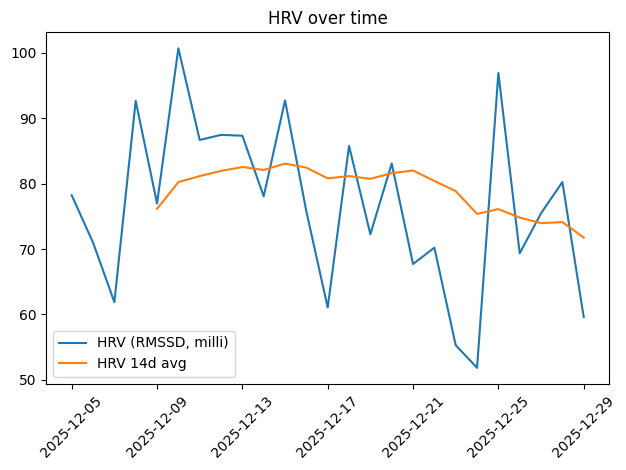

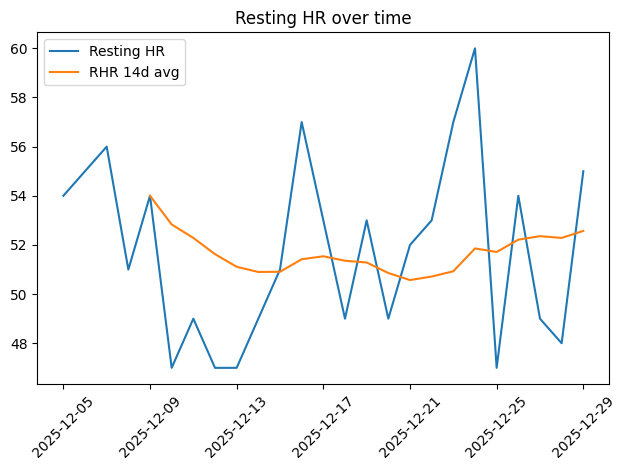

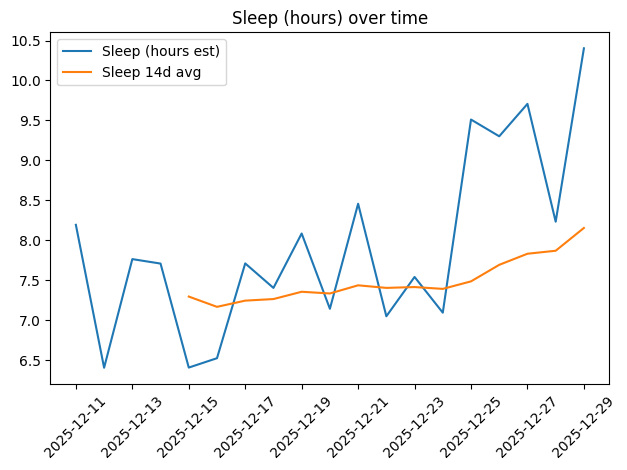

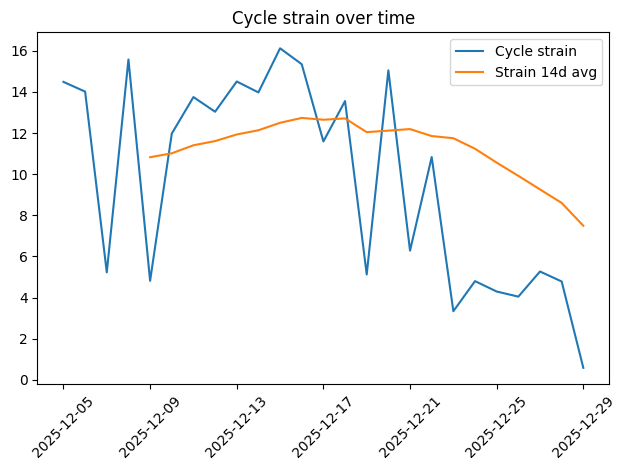

In [8]:
# Cell 8
# This cell visualizes key health metrics over time from the filtered dataframe 'dfw'.
# It plots HRV (Heart Rate Variability) RMSSD in milliseconds, along with its 14-day rolling average if available.
# Additionally, it plots resting heart rate (RHR), along with its 14-day rolling average if available.
# Each plot includes a title, legend, rotated x-axis labels for dates, and tight layout for better readability.

if "hrv_rmssd_milli" in dfw.columns:
    plt.figure()
    plt.plot(dfw["date"], dfw["hrv_rmssd_milli"], label="HRV (RMSSD, milli)")
    if "hrv_rmssd_milli_14d_avg" in dfw.columns:
        plt.plot(dfw["date"], dfw["hrv_rmssd_milli_14d_avg"], label="HRV 14d avg")
    plt.title("HRV over time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if "resting_hr" in dfw.columns:
    plt.figure()
    plt.plot(dfw["date"], dfw["resting_hr"], label="Resting HR")
    if "resting_hr_14d_avg" in dfw.columns:
        plt.plot(dfw["date"], dfw["resting_hr_14d_avg"], label="RHR 14d avg")
    plt.title("Resting HR over time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Next, it plots estimated sleep hours, along with its 14-day rolling average if available.
# This helps visualize sleep patterns over time.
if "sleep_asleep_hours_est" in dfw.columns:
    plt.figure()
    plt.plot(dfw["date"], dfw["sleep_asleep_hours_est"], label="Sleep (hours est)")
    if "sleep_asleep_hours_est_14d_avg" in dfw.columns:
        plt.plot(dfw["date"], dfw["sleep_asleep_hours_est_14d_avg"], label="Sleep 14d avg")
    plt.title("Sleep (hours) over time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Finally, it plots cycle strain, along with its 14-day rolling average if available.
# This illustrates training load and strain levels over the selected time period.
if "cycle_strain" in dfw.columns:
    plt.figure()
    plt.plot(dfw["date"], dfw["cycle_strain"], label="Cycle strain")
    if "cycle_strain_14d_avg" in dfw.columns:
        plt.plot(dfw["date"], dfw["cycle_strain_14d_avg"], label="Strain 14d avg")
    plt.title("Cycle strain over time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [9]:
# Cell 9
# This cell identifies and displays recent alerts for potential fatigue or high strain days.
# It defines a list of relevant columns including dates, health metrics, and fatigue flags.
# The list is filtered to only include columns that exist in the dataframe 'dfw'.
# Then, it filters 'dfw' to rows where either 'flag_fatigue_yellow' or 'flag_high_strain' is true,
# selects the specified columns, creates a copy called 'alerts', and displays the last 20 rows.

cols = ["date","recovery_score","hrv_rmssd_milli","resting_hr","sleep_asleep_hours_est","cycle_strain",
    "flag_low_hrv","flag_high_rhr","flag_low_sleep","flag_high_strain","flag_fatigue_red","flag_fatigue_yellow"]
cols = [c for c in cols if c in dfw.columns]

alerts = dfw[dfw.get("flag_fatigue_yellow", False) | dfw.get("flag_high_strain", False)][cols].copy()
alerts.tail(20)


,date,recovery_score,hrv_rmssd_milli,resting_hr,sleep_asleep_hours_est,cycle_strain,flag_low_hrv,flag_high_rhr,flag_low_sleep,flag_high_strain,flag_fatigue_red,flag_fatigue_yellow
0,2025-12-05,62.0,78.209410,54.0,NaN,14.488295,False,False,False,True,False,False
1,2025-12-06,52.0,70.990630,55.0,NaN,14.015359,False,False,False,True,False,False
3,2025-12-08,93.0,92.635480,51.0,NaN,15.577811,False,False,False,True,False,False
7,2025-12-12,79.0,87.438740,47.0,6.404428,13.036992,False,False,True,False,False,True
8,2025-12-13,71.0,87.313880,47.0,7.763997,14.507549,False,False,False,True,False,False
10,2025-12-15,79.0,92.700930,51.0,6.406642,16.121109,False,False,True,True,False,True
11,2025-12-16,47.0,75.744354,57.0,6.523928,15.348250,False,True,False,True,False,True
12,2025-12-17,36.0,61.066513,53.0,7.710397,11.592482,True,False,False,False,False,True
14,2025-12-19,51.0,72.256550,53.0,8.084753,5.125654,True,False,False,False,False,True
15,2025-12-20,76.0,83.061295,49.0,7.142264,15.050112,False,False,False,True,False,False


In [10]:
# Cell 10
# This cell generates a textual summary of the most recent week's aggregated health and training metrics from the weekly dataframe.
# It defines a function 'week_summary_text' that formats key metrics (e.g., average recovery, HRV, sleep, strain, workouts, and fatigue flags) into readable lines.
# If there is at least one week of data, it prints the summary for the latest week; otherwise, it indicates no data is available yet.

def week_summary_text(row):
    lines = []
    lines.append(f"Week: {row['week']}")
    if "avg_recovery" in row: lines.append(f"- Avg recovery: {row['avg_recovery']:.1f}")
    if "avg_hrv_rmssd_milli" in row: lines.append(f"- Avg HRV (RMSSD milli): {row['avg_hrv_rmssd_milli']:.1f}")
    if "avg_resting_hr" in row: lines.append(f"- Avg resting HR: {row['avg_resting_hr']:.1f}")
    if "avg_sleep_hours" in row: lines.append(f"- Avg sleep (hours est): {row['avg_sleep_hours']:.2f}")
    if "sum_cycle_strain" in row: lines.append(f"- Total strain: {row['sum_cycle_strain']:.1f}")
    if "sum_workout_count" in row: lines.append(f"- Workouts: {row['sum_workout_count']:.0f}")
    if "sum_workout_minutes" in row: lines.append(f"- Workout minutes: {row['sum_workout_minutes']:.0f}")
    if "flag_fatigue_red" in row: lines.append(f"- Red fatigue days: {int(row['flag_fatigue_red'])}")
    if "flag_fatigue_yellow" in row: lines.append(f"- Yellow fatigue days: {int(row['flag_fatigue_yellow'])}")
    return "\n".join(lines)

if len(weekly) > 0:
    print(week_summary_text(weekly.iloc[-1]))
else:
    print("No weekly rows yet.")


Week: 2025-12-23/2025-12-29
- Avg recovery: 58.3
- Avg HRV (RMSSD milli): 69.8
- Avg resting HR: 52.9
- Avg sleep (hours est): 8.83
- Total strain: 27.1
- Workouts: 1
- Workout minutes: 54
- Red fatigue days: 2
- Yellow fatigue days: 3


In [11]:

out_path = Path("data/processed/weekly_report.csv")
weekly.to_csv(out_path, index=False, lineterminator="\n", float_format="%.6f")
out_path


PosixPath('data/processed/weekly_report.csv')